In [22]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os
import seaborn as sns
from scipy import stats
import sklearn.preprocessing as skp
import sklearn.cluster as skc
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split
from scipy import linalg
import itertools

In [23]:
from matplotlib.patches import Ellipse
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange","green","pink"])

def draw_ellipse(mean, covariance, alpha,color,ax=None):
    ax = plt.gca()
    v, w = linalg.eigh(covariance)
    v = 10.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        #if not np.any(Y_ == i):
         #   continue
        #plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(mean,  v[0], v[1],
                             angle, alpha=alpha,color=color))
   
    #ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    #ell.set_clip_box(splot.bbox)
    #ell.set_alpha(alpha)
    #ax.add_patch(ell)
    #ax.add_artist(ell)
   
        


In [24]:
outdir = './data/processed_data'

In [25]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"insurance_data_train.csv" )    
X_train = pd.read_csv(filename)

## Decide on the cluster count using Elbow method 

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46873 entries, 0 to 46872
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     46873 non-null  float64
 1   age_of_car                        46873 non-null  float64
 2   age_of_policyholder               46873 non-null  float64
 3   area_cluster                      46873 non-null  int64  
 4   population_density                46873 non-null  int64  
 5   make                              46873 non-null  int64  
 6   segment                           46873 non-null  int64  
 7   model                             46873 non-null  int64  
 8   fuel_type                         46873 non-null  int64  
 9   engine_type                       46873 non-null  int64  
 10  airbags                           46873 non-null  int64  
 11  rear_brakes_type                  46873 non-null  int64  
 12  disp

In [27]:
###Decide n-cluster using Elbow Method
bic=[]
aic =[]
k_range = range(2,15)
for i in k_range:
    gmm_temp = GaussianMixture(n_components=i, n_init=10)
    gmm_temp.fit(X_train)
    bic.append(gmm_temp.bic(X_train))
    aic.append(gmm_temp.aic(X_train))

# save the data for future use
bic_filename = os.path.join(outdir, f"insurance_bic_scores.npy" )    
np.save(bic_filename, bic)

aic_filename = os.path.join(outdir, f"insurance_aic_scores.npy" )    
np.save(aic_filename, aic)

In [3]:
print(len(bic))

0


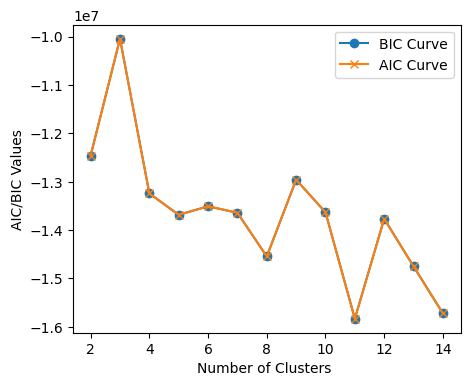

In [113]:
bic_filename = os.path.join(outdir, f"insurance_bic_scores.npy" )    
aic_filename = os.path.join(outdir, f"insurance_bic_scores.npy" )    
x_range = np.arange(2,15)
bic=np.load(bic_filename)
aic =np.load(aic_filename)


fig1 = plt.figure(figsize = (5,4))
plt.plot(x_range, bic, marker='o', label = "BIC Curve")
plt.plot(x_range, aic, marker='x', label = "AIC Curve")
plt.xlabel("Number of Clusters ")
plt.ylabel("AIC/BIC Values")
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
#fig1.suptitle("Elbow Method");
plt.legend()
plt.show()

In [114]:
bgm = BayesianGaussianMixture(n_components=12, n_init=10, reg_covar=1e-2)
bgm.fit(X_train)
np.round(bgm.weights_, 2)

array([0.  , 0.01, 0.05, 0.01, 0.01, 0.02, 0.24, 0.3 , 0.31, 0.01, 0.01,
       0.03])

In [28]:
gmm = GaussianMixture(n_components=11, n_init=10)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46873 entries, 0 to 46872
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     46873 non-null  float64
 1   age_of_car                        46873 non-null  float64
 2   age_of_policyholder               46873 non-null  float64
 3   area_cluster                      46873 non-null  int64  
 4   population_density                46873 non-null  int64  
 5   make                              46873 non-null  int64  
 6   segment                           46873 non-null  int64  
 7   model                             46873 non-null  int64  
 8   fuel_type                         46873 non-null  int64  
 9   engine_type                       46873 non-null  int64  
 10  airbags                           46873 non-null  int64  
 11  rear_brakes_type                  46873 non-null  int64  
 12  disp

In [30]:
gmm.fit(X_train)

GaussianMixture(n_components=11, n_init=10)

In [31]:
labels = gmm.predict(X_train)

In [32]:
X_train.shape

(46873, 40)

In [33]:
X_train['labels'] = labels

In [34]:
X_train.shape

(46873, 41)

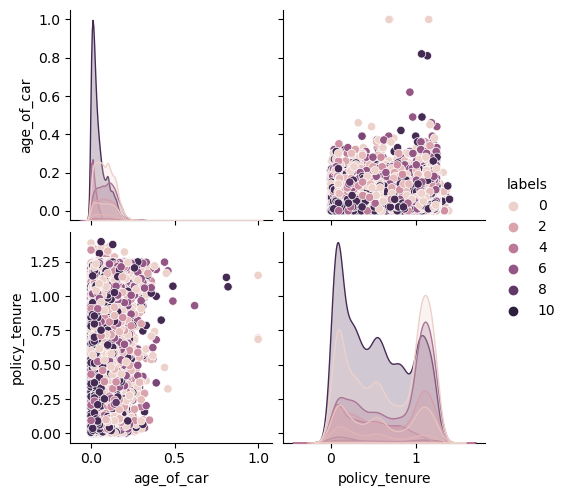

In [35]:
sns.pairplot(X_train, vars=["age_of_car","policy_tenure"], hue="labels")

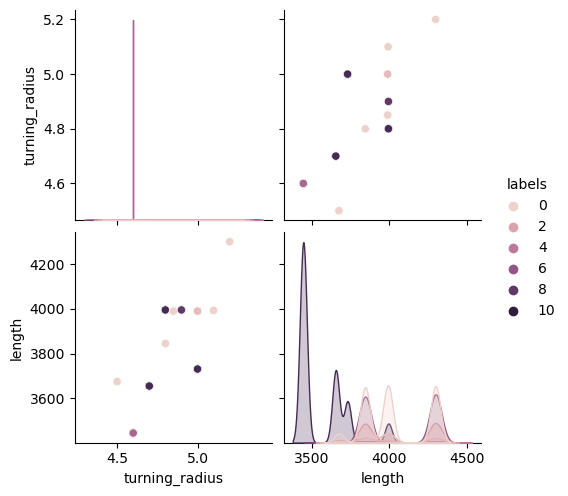

In [40]:
sns.pairplot(X_train, vars=["turning_radius","length"], hue="labels")

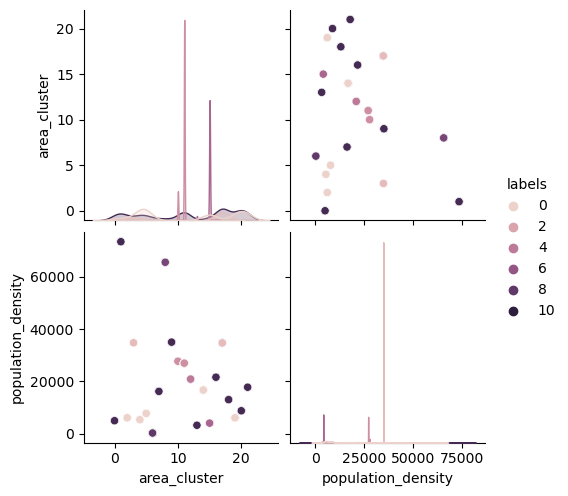

In [37]:
sns.pairplot(X_train, vars=["area_cluster","population_density"], hue="labels")

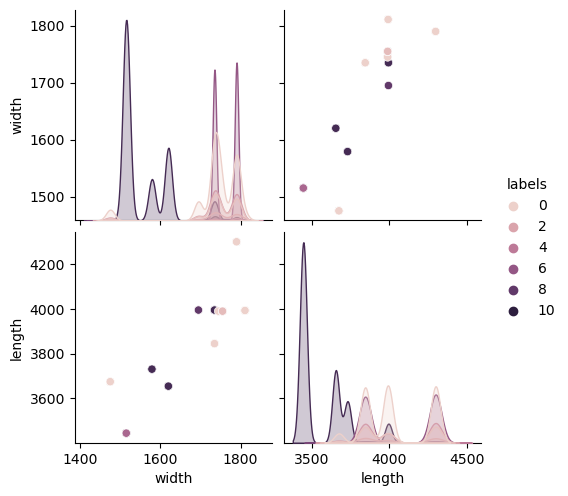

In [39]:
sns.pairplot(X_train, vars=["width","length"], hue="labels")

In [ ]:
# Store the gmm for insurance data 

gmm_filename = os.path.join(outdir, f"gmm_insurance_trained.joblib" ) 
dump(gmm, gmm_filename)
   

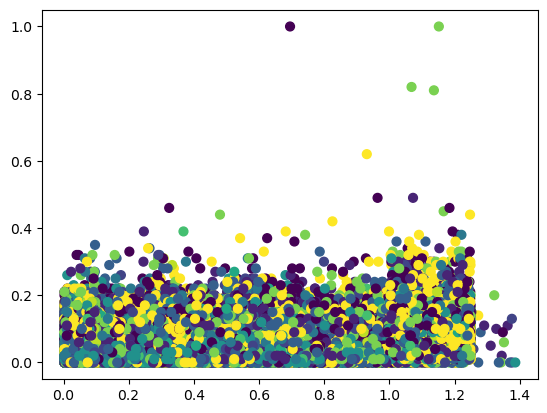

In [132]:
#size = 50 * predictions.max(1) ** 2  # square emphasizes differences
#plt.scatter(X_train["BMI"], X_train["GenHlth"], c=labels, cmap='viridis', s=size);
ax = plt.gca()
ax.scatter(X_train["policy_tenure"], X_train["age_of_car"], c=labels, s=40, cmap='viridis', zorder=2)
w_factor = 0.2 / gmm.weights_.max()
for mean, covar, w, color in zip(gmm.means_, gmm.covariances_, gmm.weights_, color_iter):
    alpha =w * w_factor 
    draw_ellipse(mean, covar, w, color,ax)

plt.show()

In [ ]:
cluster_means = gmm.means_



In [ ]:
plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = predictions == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [125]:
gmm.converged_

True

In [159]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## K Modes Algorithm

In [41]:
from kmodes.kmodes import KModes

In [42]:
filename = os.path.join(outdir, f"insurance_data_train.csv" )    
X_train = pd.read_csv(filename)

#### Scree Plot or Elbow Curve

In [49]:
cost = []

K = range(2,7)
for num_clusters in list(K):
    kmode = KModes(num_clusters, init="random",n_init=5,verbose=1)
    kmode.fit_predict(X_train)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 364, cost: 643042.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2308, cost: 631080.0
Run 2, iteration: 2/100, moves: 674, cost: 631070.0
Run 2, iteration: 3/100, moves: 1, cost: 631070.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4210, cost: 643047.0
Run 3, iteration: 2/100, moves: 364, cost: 643047.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5880, cost: 631072.0
Run 4, iteration: 2/100, moves: 114, cost: 631070.0
Run 4, iteration: 3/100, moves: 1, cost: 631070.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 866, cost: 631070.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
St

In [50]:
kmode_cost_filename = os.path.join(outdir, f"kmode_insurance_costs.npy" )    
np.save(kmode_cost_filename, cost)

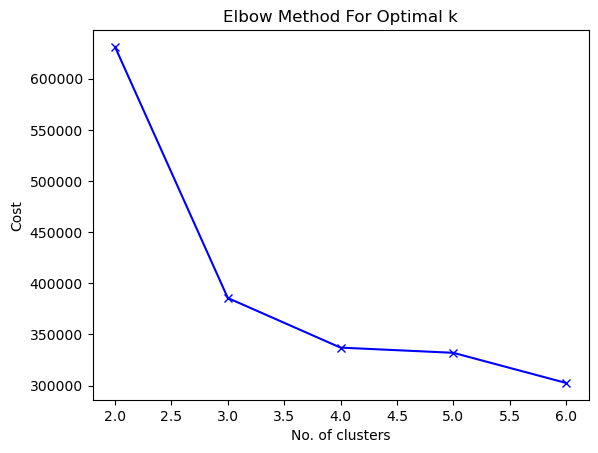

In [51]:
kmode_cost_filename = os.path.join(outdir, f"kmode_insurance_costs.npy" )      
k_range = np.arange(2,7)
k_costs=np.load(kmode_cost_filename)

plt.plot(k_range, k_costs[:5], 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhouette Coefficient 

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []

K = range(2,7)
for num_clusters in list(K):
    kmode = KModes(num_clusters, init="random",n_init=5,verbose=1)
    kmode_fitted=kmode.fit(X_train)
    cluster_labels = kmode_fitted.labels_
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22224, cost: 651288.0
Run 1, iteration: 2/100, moves: 6543, cost: 643047.0
Run 1, iteration: 3/100, moves: 294, cost: 643047.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2314, cost: 643269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2375, cost: 631070.0
Run 3, iteration: 2/100, moves: 86, cost: 631070.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 25938, cost: 643296.0
Run 4, iteration: 2/100, moves: 2032, cost: 643269.0
Run 4, iteration: 3/100, moves: 10, cost: 643269.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2273, cost: 631080.0
Run 5, iteration: 2/100, moves: 672, cost: 631070.0
Run 5, iteration: 3/1

In [54]:
kmode_silhoutte_filename = os.path.join(outdir, f"kmode_insurance_silhouette.npy" )    
np.save(kmode_silhoutte_filename, silhouette_scores)

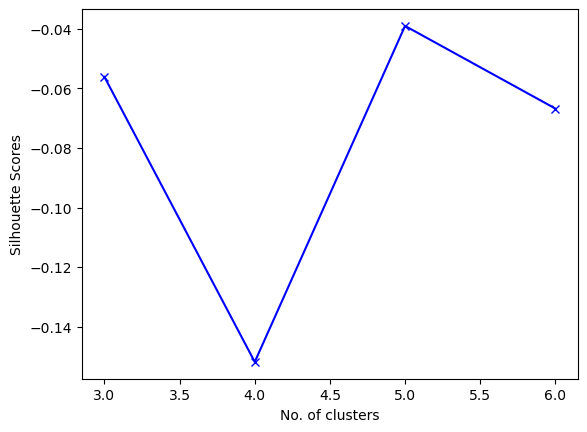

In [55]:
kmode_sil_filename = os.path.join(outdir, f"kmode_insurance_silhouette.npy" )      
k_range = np.arange(3,7)
k_sil=np.load(kmode_sil_filename)

plt.plot(k_range, k_sil[1:5], 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
#plt.title('Elbow Method For Optimal k')
plt.show()

### Train KMode for clusters 

In [43]:
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3464, cost: 353883.0
Run 1, iteration: 2/100, moves: 1637, cost: 353661.0
Run 1, iteration: 3/100, moves: 141, cost: 353661.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 15714, cost: 385401.0
Run 2, iteration: 2/100, moves: 1509, cost: 385400.0
Run 2, iteration: 3/100, moves: 0, cost: 385400.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6482, cost: 430901.0
Run 3, iteration: 2/100, moves: 15149, cost: 385603.0
Run 3, iteration: 3/100, moves: 584, cost: 385596.0
Run 3, iteration: 4/100, moves: 7, cost: 385596.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2986, cost: 386449.0
Run 4, iteration: 2/100, moves: 1, cost: 386449.0
Init: initializing centroids
Init: initializing clust

In [45]:
X_train['kmode_labels'] = clusters

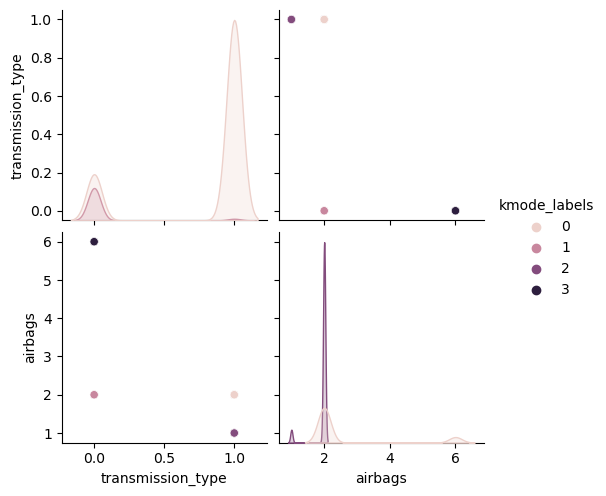

In [46]:
sns.pairplot(X_train, vars=["transmission_type","airbags"], hue="kmode_labels")

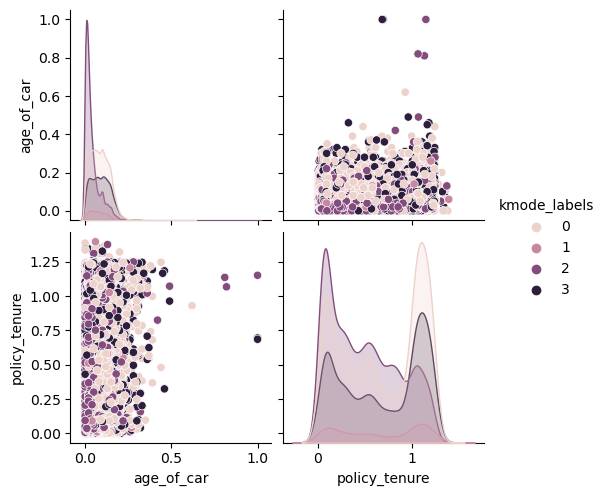

In [47]:
sns.pairplot(X_train, vars=["age_of_car","policy_tenure"], hue="kmode_labels")

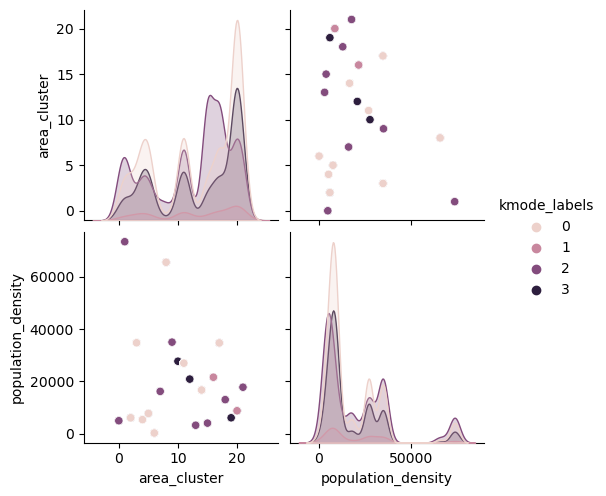

In [48]:
sns.pairplot(X_train, vars=["area_cluster","population_density"], hue="kmode_labels")

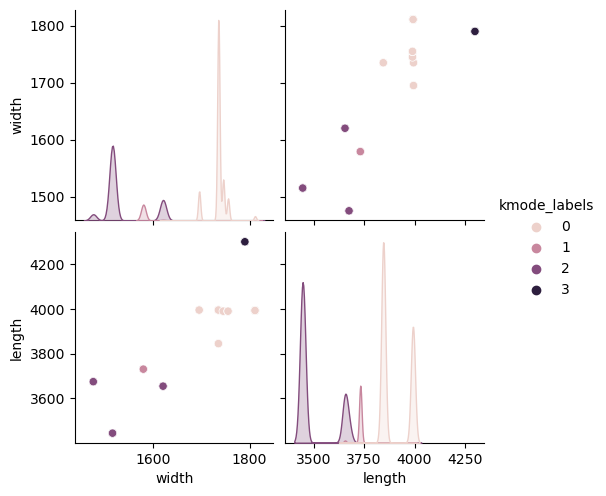

In [49]:
sns.pairplot(X_train, vars=["width","length"], hue="kmode_labels")

In [ ]:
# store trained kmodes on file 
kmodes_filename = os.path.join(outdir, f"kmodes_insurance_trained.joblib" ) 
dump(kmode, kmodes_filename)
   